##### The cell below is for you to keep track of the libraries used and install those libraries quickly
##### Ensure that the proper library names are used and the syntax of `%pip install PACKAGE_NAME` is followed

In [27]:
# %pip install pandas 
# %pip install matplotlib
#%pip install statsmodels
#%pip install seaborn
#%pip install scikit-learn
#%pip install mlxtend
#%pip install numpy
#%pip install xgboost
#%pip install catboost
# add commented pip installation lines for packages used as shown above for ease of testing
# the line should be of the format %pip install PACKAGE_NAME 

## **DO NOT CHANGE** the filepath variable
##### Instead, create a folder named 'data' in your current working directory and 
##### have the .csv file inside that. A relative path *must* be used when loading data into pandas

In [173]:
# Can have as many cells as you want for code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import xgboost as xgb
import catboost as cb



filepath = "./data/catA_train.csv" 
# the initialised filepath MUST be a relative path to a folder named data that contains the parquet file

### **ALL** Code for machine learning and dataset analysis should be entered below. 
##### Ensure that your code is clear and readable.
##### Comments and Markdown notes are advised to direct attention to pieces of code you deem useful.

## 1. Processing Data

#### 1.A Percentage of Missing Values in Each Column

In [174]:
df = pd.read_csv(filepath)
df.isna().sum() / len(df) * 100

LATITUDE                                 0.411212
LONGITUDE                                0.411212
AccountID                                0.000000
Company                                  0.000000
SIC Code                                 0.000000
Industry                                 0.000000
8-Digit SIC Code                         0.000000
8-Digit SIC Description                  0.000000
Year Found                               1.487218
Entity Type                              0.000000
Parent Company                           1.761360
Parent Country                           1.781920
Ownership Type                           0.000000
Company Description                      0.000000
Square Footage                         100.000000
Company Status (Active/Inactive)         0.000000
Employees (Single Site)                 42.502227
Employees (Domestic Ultimate Total)      0.270715
Employees (Global Ultimate Total)        9.505860
Sales (Domestic Ultimate Total USD)      0.000000


#### 1.B Correlation and Description

In [175]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
corr_matrix = numerical_df.corr()

# Change it to a DataFrame
corr = pd.DataFrame(corr_matrix)

corr

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
LATITUDE,1.000000,-0.048014,-0.086447,-0.086741,-0.023920,NaN,0.001218,0.004256,-0.010028,0.004602,-0.010685,-0.004247,-0.039308
LONGITUDE,-0.048014,1.000000,0.027467,0.027591,-0.008341,NaN,-0.006147,0.013906,0.003871,-0.006884,0.008687,0.001314,0.009406
SIC Code,-0.086447,0.027467,1.000000,0.999772,0.195683,NaN,-0.050296,-0.022058,0.001587,-0.011493,-0.014743,0.016096,0.087371
8-Digit SIC Code,-0.086741,0.027591,0.999772,1.000000,0.195632,NaN,-0.051988,-0.022178,0.001607,-0.011480,-0.014717,0.015921,0.087409
Year Found,-0.023920,-0.008341,0.195683,0.195632,1.000000,NaN,-0.060472,-0.046540,-0.025981,0.014523,-0.021591,0.076785,0.111644
Square Footage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Employees (Single Site),0.001218,-0.006147,-0.050296,-0.051988,-0.060472,NaN,1.000000,0.139117,0.008463,0.003556,0.001529,-0.016421,0.004828
Employees (Domestic Ultimate Total),0.004256,0.013906,-0.022058,-0.022178,-0.046540,NaN,0.139117,1.000000,0.020404,0.016907,0.024359,-0.060550,-0.044336
Employees (Global Ultimate Total),-0.010028,0.003871,0.001587,0.001607,-0.025981,NaN,0.008463,0.020404,1.000000,-0.003966,0.663478,0.076545,-0.087329
Sales (Domestic Ultimate Total USD),0.004602,-0.006884,-0.011493,-0.011480,0.014523,NaN,0.003556,0.016907,-0.003966,1.000000,0.098110,-0.054561,-0.039314


In [176]:
df.describe()

,LATITUDE,LONGITUDE,SIC Code,8-Digit SIC Code,Year Found,Square Footage,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate
count,29062.000000,29062.000000,29182.000000,2.918200e+04,28748.000000,0.0,16779.000000,29103.000000,2.640800e+04,2.918200e+04,2.918200e+04,29182.000000,29182.000000
mean,1.320677,103.843324,6169.271160,6.169092e+07,2004.505913,NaN,36.856189,139.764182,6.994665e+03,7.520992e+08,3.931771e+09,0.500069,0.257248
std,0.043740,0.053757,1705.845535,1.705778e+07,13.464238,NaN,173.334420,1118.939249,4.539462e+04,1.019636e+10,2.184589e+10,0.500009,0.437125
min,1.238792,103.611319,132.000000,1.320000e+06,1819.000000,NaN,1.000000,1.000000,1.000000e+00,-1.502631e+08,1.000000e+00,0.000000,0.000000
25%,1.284665,103.831874,5084.000000,5.084000e+07,1997.000000,NaN,10.000000,4.000000,4.000000e+00,1.026308e+06,1.026308e+06,0.000000,0.000000
50%,1.309701,103.848989,6719.000000,6.719000e+07,2008.000000,NaN,16.000000,16.000000,1.500000e+01,2.606644e+06,3.259582e+06,1.000000,0.000000
75%,1.337889,103.865922,7311.000000,7.311000e+07,2014.000000,NaN,29.000000,60.000000,1.000000e+02,2.176969e+07,1.482258e+08,1.000000,1.000000
max,1.469800,104.003218,9721.000000,9.721990e+07,2023.000000,NaN,12000.000000,80000.000000,2.190000e+06,3.184764e+11,5.140000e+11,1.000000,1.000000


#### 1.C Dropping Irrelevant Features

In [177]:
new_df = df.copy()

variables_to_remove = [
    'AccountID', 'Company', '8-Digit SIC Code',
    'Parent Country', 'Import/Export Status', 'Domestic Ultimate Company',
    '8-Digit SIC Description', 'Company Description', 'Company Status (Active/Inactive)',
    'Fiscal Year End', 'Global Ultimate Company',
    'Global Ultimate Country','Parent Company', 'Industry', 'Square Footage'
]

new_df = new_df.drop(variables_to_remove, axis=1)
new_df.head()
#Drop remaining na rows
new_df = new_df.dropna()
print(len(new_df))
print(new_df.isna().sum() / len(new_df) * 100)

14311
LATITUDE                               0.0
LONGITUDE                              0.0
SIC Code                               0.0
Year Found                             0.0
Entity Type                            0.0
Ownership Type                         0.0
Employees (Single Site)                0.0
Employees (Domestic Ultimate Total)    0.0
Employees (Global Ultimate Total)      0.0
Sales (Domestic Ultimate Total USD)    0.0
Sales (Global Ultimate Total USD)      0.0
Is Domestic Ultimate                   0.0
Is Global Ultimate                     0.0
dtype: float64


## 2. One-Hot Encoding and Imputation 

#### 2.A Binning 'SIC Code' into categories and creation of new column 'Industrys'

In [178]:
# Convert SIC Code into Industrys and add a new column to the new_df
industry_mapping = {
    (101, 999): 'Agriculture',
    (1002, 1499): 'Mining',
    (1500, 1799): 'Construction',
    (2000, 3999): 'Manufacturing',
    (4000, 4999): 'Transportation',
    (5000, 5199): 'Wholesales',
    (5200, 5999): 'Retail',
    (6000, 6799): 'Finance',
    (7000, 8999): 'Services',
    (9000, 9899): 'Public',
    (9900, 10000): 'Others'
}
def map_to_industry(sic_code):
    for code_range, industry in industry_mapping.items():
        if code_range[0] < sic_code <= code_range[1]:
            return industry
    return 'Other'

# Create a new column 'Industry' based on the mapping
new_df['Industrys'] = new_df['SIC Code'].map(map_to_industry)
new_df.drop('SIC Code',axis=1)

,LATITUDE,LONGITUDE,Year Found,Entity Type,Ownership Type,Employees (Single Site),Employees (Domestic Ultimate Total),Employees (Global Ultimate Total),Sales (Domestic Ultimate Total USD),Sales (Global Ultimate Total USD),Is Domestic Ultimate,Is Global Ultimate,Industrys
1,1.291294,103.827476,2015.0,Subsidiary,Private,39.0,100.0,100.0,7.093536e+09,7.093536e+09,0.0,0.0,Transportation
2,1.300144,103.857517,1993.0,Subsidiary,Private,4.0,4.0,4.0,1.026308e+06,1.026308e+06,1.0,0.0,Finance
3,1.300785,103.791263,2006.0,Subsidiary,Private,10.0,100.0,100.0,7.339898e+10,7.339898e+10,0.0,0.0,Finance
5,1.444773,103.812740,1986.0,Subsidiary,Private,300.0,4.0,4.0,1.026308e+06,1.026308e+06,0.0,0.0,Transportation
7,1.282887,103.850849,2010.0,Subsidiary,Private,10.0,4.0,4.0,1.026308e+06,1.026308e+06,0.0,0.0,Finance
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29171,1.274915,103.799145,2020.0,Subsidiary,Private,10.0,80.0,80.0,1.307680e+07,1.307680e+07,0.0,0.0,Finance
29175,1.292221,103.850613,2009.0,Subsidiary,Private,25.0,10.0,10.0,4.404600e+05,4.404600e+05,0.0,0.0,Services
29176,1.277753,103.848429,1996.0,Subsidiary,Private,100.0,100.0,4556.0,6.344614e+06,1.402050e+09,1.0,0.0,Construction
29180,1.295595,103.858968,2018.0,Subsidiary,Private,10.0,4.0,4.0,1.026308e+06,1.026308e+06,0.0,0.0,Finance


##### 2.A.1 Graph Sales (Domestic Ultimate Total USD) by Industrys (IMPROVE THIS GRAPH PLS)

Sales (Domestic Ultimate Total USD)    Axes(0.125,0.11;0.775x0.77)
dtype: object

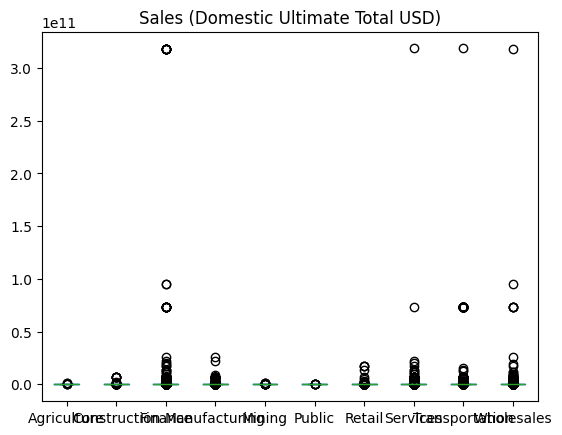

In [179]:
# Plot Sales (Domestic Ultimate Total USD) vs Industrys
new_df.plot.box(by = 'Industrys',column = 'Sales (Domestic Ultimate Total USD)')

# OR I NEED A GRAPH OF MEAN SALES BY INDUSTRY AGAINST THE SALES (DOMESTIC ULTIMATE TOTAL USD)

#### 2.B Imputation of Import/Export

##### 2.C.1 Exploring Relationship between Import/Export 

#### 2.C Imputation of Missing Values for Employees (Domestic Ultimate Total)

##### 2.C.1 Exploring Relationship between Employees (Domestic Ultimate Total) and Employees (Single Site)

count    14311.000000
mean       166.534344
std       1230.665531
min          1.000000
25%          5.000000
50%         18.000000
75%         80.000000
max      80000.000000
Name: Employees (Domestic Ultimate Total), dtype: float64
Axes(0.125,0.11;0.775x0.77)
                                     Employees (Domestic Ultimate Total)  \
Employees (Domestic Ultimate Total)                             1.000000   
Employees (Single Site)                                         0.150038   

                                     Employees (Single Site)  
Employees (Domestic Ultimate Total)                 0.150038  
Employees (Single Site)                             1.000000  
                                     Employees (Domestic Ultimate Total)  \
Employees (Domestic Ultimate Total)                             1.000000   
Sales (Domestic Ultimate Total USD)                             0.017907   

                                     Sales (Domestic Ultimate Total USD)  
Employees (Domes

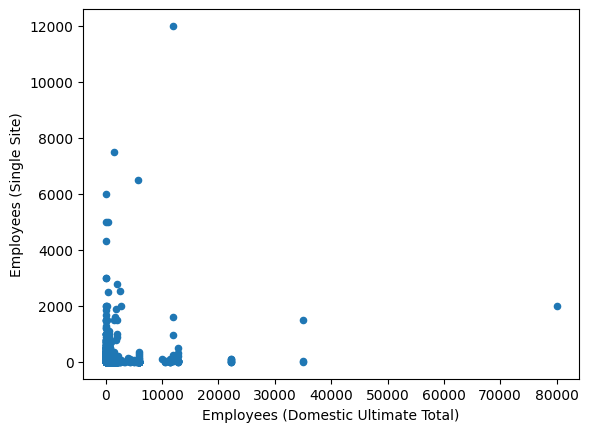

In [180]:
print(new_df['Employees (Domestic Ultimate Total)'].describe()) #mean = 139.764182

print(new_df.plot.scatter(x = 'Employees (Domestic Ultimate Total)', y = 'Employees (Single Site)'))

print(new_df[['Employees (Domestic Ultimate Total)', 'Employees (Single Site)']].corr())
print(new_df[['Employees (Domestic Ultimate Total)', 'Sales (Domestic Ultimate Total USD)']].corr())

##### 2.C.2 Imputation of Missing Values from OLS Regression

In [181]:
## Run OLS on Employees (Domestic Ultimate Total) using Emplyees (Single Site)
result2 = sm.ols(formula="Q('Employees (Domestic Ultimate Total)') ~ Q('Employees (Single Site)')", data=new_df).fit()
print(result2.summary())  # Check if results are significant

# Identify indices with missing values in 'Employees (Domestic Ultimate Total)' but not in 'Employees (Single Site)'
missing_indices = new_df[new_df['Employees (Domestic Ultimate Total)'].isnull() & new_df['Employees (Single Site)'].notnull()].index

# Predict missing values using the fitted model
predicted_values = result2.predict(new_df.loc[missing_indices, ['Employees (Single Site)']])

# Replace missing values with predicted values
new_df.loc[missing_indices, 'Employees (Domestic Ultimate Total)'] = predicted_values

# Only five rows left where we cannot replace with Employees (Single Site)
remaining_missing = new_df.loc[new_df['Employees (Domestic Ultimate Total)'].isna()][['Employees (Single Site)', 'Employees (Domestic Ultimate Total)']]
print(remaining_missing)
new_df = new_df[new_df['Employees (Domestic Ultimate Total)'].notna()]
len(new_df['Employees (Domestic Ultimate Total)'])

                                       OLS Regression Results                                       
Dep. Variable:     Q('Employees (Domestic Ultimate Total)')   R-squared:                       0.023
Model:                                                  OLS   Adj. R-squared:                  0.022
Method:                                       Least Squares   F-statistic:                     329.5
Date:                                      Mon, 29 Jan 2024   Prob (F-statistic):           7.96e-73
Time:                                              16:25:13   Log-Likelihood:            -1.2197e+05
No. Observations:                                     14311   AIC:                         2.439e+05
Df Residuals:                                         14309   BIC:                         2.440e+05
Df Model:                                                 1                                         
Covariance Type:                                  nonrobust                                

14311

#### 2.D Imputation of Missing Values for 'Year Found'

In [182]:
print(new_df['Year Found'].describe())

## Replace missing values in Year Found by the median 2008 
new_df['Year Found'] = new_df['Year Found'].fillna(2008)

print(new_df[['Year Found', 'Sales (Domestic Ultimate Total USD)']].corr())

result = sm.ols(formula="new_df['Sales (Domestic Ultimate Total USD)'] ~ new_df['Year Found']", data=new_df).fit()
print(result.summary()) #Significant 

#len(df.loc[df['Year Found']==2008]) #1116
#len(new_df.loc[new_df['Year Found']==2008]) #1550

count    14311.000000
mean      2004.369017
std         12.265865
min       1887.000000
25%       1998.000000
50%       2007.000000
75%       2013.000000
max       2023.000000
Name: Year Found, dtype: float64
                                     Year Found  \
Year Found                             1.000000   
Sales (Domestic Ultimate Total USD)    0.032222   

                                     Sales (Domestic Ultimate Total USD)  
Year Found                                                      0.032222  
Sales (Domestic Ultimate Total USD)                             1.000000  
                                          OLS Regression Results                                         
Dep. Variable:     new_df['Sales (Domestic Ultimate Total USD)']   R-squared:                       0.001
Model:                                                       OLS   Adj. R-squared:                  0.001
Method:                                            Least Squares   F-statistic:               

#### 2.E One-Hot Encoding for Entity Type, Ownership Type, and Industrys


In [185]:
df_copy = new_df.copy()
print(df_copy)
# df_copy = df_copy.drop(['Sales (Domestic Ultimate Total USD)'],axis=1)

#df=df.join(pd.get_dummies(df.Industrys))
df_copy=pd.get_dummies(df_copy, columns=['Industrys'],drop_first=True)
df_copy=pd.get_dummies(df_copy, columns=['Entity Type'],drop_first=True)
df_copy=pd.get_dummies(df_copy, columns=['Ownership Type'],drop_first=True)

# df_copy.columns = df_copy.columns.str.replace('Industrys_', '')
# df_copy.columns = df_copy.columns.str.replace('Entity Type_', '')
# df_copy.columns = df_copy.columns.str.replace('Ownership Type_', '')
# df_copy = df_copy.dropna()
print(df_copy)

       LATITUDE   LONGITUDE  SIC Code  Year Found Entity Type Ownership Type  \
1      1.291294  103.827476    4449.0      2015.0  Subsidiary        Private   
2      1.300144  103.857517    6719.0      1993.0  Subsidiary        Private   
3      1.300785  103.791263    6719.0      2006.0  Subsidiary        Private   
5      1.444773  103.812740    4959.0      1986.0  Subsidiary        Private   
7      1.282887  103.850849    6719.0      2010.0  Subsidiary        Private   
...         ...         ...       ...         ...         ...            ...   
29171  1.274915  103.799145    6719.0      2020.0  Subsidiary        Private   
29175  1.292221  103.850613    7389.0      2009.0  Subsidiary        Private   
29176  1.277753  103.848429    1731.0      1996.0  Subsidiary        Private   
29180  1.295595  103.858968    6719.0      2018.0  Subsidiary        Private   
29181  1.311769  103.801710    5099.0      2018.0  Subsidiary        Private   

       Employees (Single Site)  Employe

In [188]:

# Assuming df is your DataFrame with 'Year Found', 'Sales', and 'Industrys' columns

# Create a dictionary to map each unique industry to a unique color
industry_palette = sns.color_palette('Set1', n_colors=len(df_copy['Industrys'].unique()))
industry_colors = dict(zip(df_copy['Industrys'].unique(), industry_palette))

# Scatter plot for 'Year Found' vs 'Sales' with colors based on industries
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year Found', y='Sales (Domestic Ultimate Total USD)', hue='Industrys', palette=industry_colors, data=df)
plt.title('Scatter plot of Year Found vs Sales with Industry Colors')
plt.legend(title='Industrys', bbox_to_anchor=(1, 1))
plt.show()


ValueError: Could not interpret value `Industrys` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [43]:


#ScatterPlot for 'Employees' vs 'Sales (Domestic Ultimate Total USD) removed outliers 3 standard deviation away'

# Get unique industries
unique_industries = df['Industrys'].unique()

# Create a dictionary to map each unique industry to a unique color
industry_colors = dict(zip(unique_industries, sns.color_palette('Set1', n_colors=len(unique_industries))))

# Drop rows with missing values in the selected columns
df_filtered = df.dropna(subset=['Employees (Domestic Ultimate Total)', 'Sales (Domestic Ultimate Total USD)'])

# Z-score normalization to identify outliers
z_scores = zscore(df_filtered[['Employees (Domestic Ultimate Total)', 'Sales (Domestic Ultimate Total USD)']])
threshold = 3
filtered_indices = (z_scores < threshold).all(axis=1)
df_no_outliers = df_filtered[filtered_indices]

# Plot the scatterplot without outliers with smaller circles
plt.figure(figsize=(10, 6))
for industry in unique_industries:
    subset = df_no_outliers[df_no_outliers['Industrys'] == industry]
    if not subset.empty:  # Check if there is data for the industry
        color = industry_colors[industry]
        plt.scatter(subset['Employees (Domestic Ultimate Total)'], subset['Sales (Domestic Ultimate Total USD)'], label=industry, color=color, s=20)

# Calculate the percentage of original data shown
percentage_shown = (len(df_no_outliers) / len(df_filtered)) * 100

# Annotate the plot with the percentage at the bottom
plt.text(0.5, -0.2, f'{percentage_shown:.2f}% of original data shown', transform=plt.gca().transAxes, ha='center', va='center')

plt.xlabel('Employees (Domestic Ultimate Total)')
plt.ylabel('Sales (Domestic Ultimate Total USD)')
plt.title('Scatterplot between Employees and Sales with Industry Colors (No Outliers)')
plt.legend()

plt.show()

KeyError: 'Industrys'

#### Exploring 'Industrys'

In [ ]:
#To do -> look at the error in plots 

variables = df.columns

# Creating scatter plots
# for i in range(len(variables)):
#     for j in range(i + 1, len(variables)):
#         try:
#             plt.scatter(df[variables[i]], df[variables[j]])
#             plt.title(f'{variables[i]} vs {variables[j]}')
#             plt.xlabel(variables[i])
#             plt.ylabel(variables[j])
#             plt.show()
#         except Exception as e:
#             print(f"Error plotting {variables[i]} vs {variables[j]}: {e}")

sns.scatterplot(x='Year Found', y='Sales (Domestic Ultimate Total USD)', data=df)
plt.show()

# Grouped Analysis
sns.barplot(x='Industrys', y='Employees (Domestic Ultimate Total)', data=df)
plt.xticks(rotation=45)
plt.show()

# Time Series Analysis
sns.lineplot(x='Year Found', y='Sales (Domestic Ultimate Total USD)', data=df)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Year Found'], bins=20, kde=True)
plt.title('Distribution of Year Found')
plt.show()

# # Explore the distribution of 'Employees'
# plt.figure(figsize=(10, 6))
# sns.histplot(df['Employees (Domestic Ultimate Total)'], bins=20, kde=True)
# plt.title('Distribution of Employees')
# plt.show()

# # Explore the distribution of 'Sales'
# plt.figure(figsize=(10, 6))
# sns.histplot(df['Sales (Domestic Ultimate Total USD)'], bins=20, kde=True)
# plt.title('Distribution of Sales')
# plt.show()

# Box plot for 'Employees' by 'Entity Type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Entity Type', y='Employees (Domestic Ultimate Total)', data=df)
plt.title('Box plot of Employees by Entity Type')
plt.show()

# Box plot for 'Sales' by 'Ownership Type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ownership Type', y='Sales (Domestic Ultimate Total USD)', data=df)
plt.title('Box plot of Sales by Ownership Type')
plt.show()

# Count plot for 'Industrys'
plt.figure(figsize=(10, 6))
sns.countplot(x='Industrys', data=df)
plt.title('Count plot of Industries')
plt.xticks(rotation=45)
plt.show()

# Scatter plot for 'Year Found' vs 'Sales'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year Found', y='Sales (Domestic Ultimate Total USD)', data=df)
plt.title('Scatter plot of Year Found vs Sales')
plt.show()

numeric_columns = new_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = new_df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for ori dataset')
plt.show()

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

FEATURE SELECTION (STEPWISE)

In [343]:
df_copy2 = df_copy
# print(df_copy2)
# Define your predictors and response variable
y = df_copy2['Sales (Domestic Ultimate Total USD)']
X = df_copy2.drop('Sales (Domestic Ultimate Total USD)', axis = 1)

#y = df_copy2['Sales (Domestic Ultimate Total USD)']
#df_copy2 = df_copy2.dropna()

print(X)
# Splitting the data into training and testing sets for model validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize Linear Regression model
lr = LinearRegression()

# Initialize SequentialFeatureSelector
sfs = SFS(lr, 
          k_features='best', 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

# Perform SFS
sfs = sfs.fit(X_train, y_train)

# Print the selected feature indices and names
selected_features_indices = sfs.k_feature_idx_
selected_features_names = X.columns[list(selected_features_indices)]

print('Selected features indices:', selected_features_indices)
print('Selected features names:', selected_features_names)

       LATITUDE   LONGITUDE  Year Found  Employees (Single Site)  \
1      1.291294  103.827476      2015.0                     39.0   
2      1.300144  103.857517      1993.0                      4.0   
3      1.300785  103.791263      2006.0                     10.0   
5      1.444773  103.812740      1986.0                    300.0   
7      1.282887  103.850849      2010.0                     10.0   
...         ...         ...         ...                      ...   
29171  1.274915  103.799145      2020.0                     10.0   
29175  1.292221  103.850613      2009.0                     25.0   
29176  1.277753  103.848429      1996.0                    100.0   
29180  1.295595  103.858968      2018.0                     10.0   
29181  1.311769  103.801710      2018.0                     11.0   

       Employees (Domestic Ultimate Total)  Employees (Global Ultimate Total)  \
1                                    100.0                              100.0   
2                    

/Users/jirawan/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/jirawan/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/jirawan/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/jirawan/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/Users/jirawan/Library/Python/3.9/lib/python/site-packages/s

Selected features indices: (2, 3, 4, 5, 6, 7, 9, 12, 13, 14, 16, 18, 19, 21, 22)
Selected features names: Index(['Year Found', 'Employees (Single Site)',
       'Employees (Domestic Ultimate Total)',
       'Employees (Global Ultimate Total)',
       'Sales (Global Ultimate Total USD)', 'Is Domestic Ultimate',
       'Industrys_Construction', 'Industrys_Mining', 'Industrys_Public',
       'Industrys_Retail', 'Industrys_Transportation',
       'Entity Type_Independent', 'Entity Type_Parent',
       'Ownership Type_Nonprofit', 'Ownership Type_Partnership'],
      dtype='object')


Linear Regression Model

In [345]:
import sklearn


lr = LinearRegression()
# Fit the model with selected features
lr.fit(X_train[selected_features_names], y_train)

# Make predictions using your trained model
y_pred = lr.predict(X_test[selected_features_names])

# Calculate metrics
mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = sklearn.metrics.r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 1850116502.6987212
Mean Squared Error (MSE): 1.808919168348714e+20
Root Mean Squared Error (RMSE): 13449606568.032814
R-squared (R2): 0.015105646884100099


Gradient Boosting

In [346]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=42)

# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# # Iterate over different numbers of folds
# for n_folds in n_folds_values:
#     # Use k-fold cross-validation with the current number of folds
#     kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

#     # Perform cross-validation and get R-squared scores
#     cv_scores = cross_val_score(model, X_train[selected_features_names], y_train, cv=kf, scoring='r2')

#     # Append mean and standard deviation of R-squared scores to lists
#     mean_r2_scores.append(cv_scores.mean())
#     std_r2_scores.append(cv_scores.std())

# # Plot the results
# plt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')
# plt.xlabel('Number of Folds')
# plt.ylabel('R-squared Score')
# plt.title('Cross-Validated R-squared Scores for Different Numbers of Folds')
# plt.legend()
# plt.show()
    
# Use k-fold cross-validation with 10 folds
model_10 = GradientBoostingRegressor(random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cv_scores = cross_val_score(model, X_train[selected_features_names], y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", cv_scores.mean())
print("Standard Deviation of R-squared scores:", cv_scores.std())

# Train the model on the entire training set
model_10.fit(X_train[selected_features_names], y_train)

# Evaluate the model on the test set
test_score = model_10.score(X_test[selected_features_names], y_test)
print("Test R-squared score:", test_score)

Cross-Validation R-squared scores: [0.35195874 0.34135637 0.89121528 0.32073746 0.24062026 0.83340236
 0.1919676  0.61247947 0.73873396 0.93549258]
Mean R-squared score: 0.5457964070211071
Standard Deviation of R-squared scores: 0.2727477998402736
Test R-squared score: 0.20952359449946334


## XG-Boost


In [347]:
model = xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, max_depth=3)
model.fit(X_train, y_train)



# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# Use k-fold cross-validation with 10 folds
model_10 = xgb.XGBRegressor(random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cv_scores = cross_val_score(model, X_train[selected_features_names], y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", cv_scores.mean())
print("Standard Deviation of R-squared scores:", cv_scores.std())

# Train the model on the entire training set
model_10.fit(X_train[selected_features_names], y_train)

# Evaluate the model on the test set
test_score = model_10.score(X_test[selected_features_names], y_test)
print("Test R-squared score:", test_score)

Cross-Validation R-squared scores: [-1.24408517  0.51002605  0.86126208  0.30012629  0.38381525  0.83331344
  0.3092756   0.350533    0.24224625  0.89947637]
Mean R-squared score: 0.34459891805655934
Standard Deviation of R-squared scores: 0.5813974309768308
Test R-squared score: -0.10127779773405732


catboost

In [348]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from catboost import CatBoostRegressor

# Initialize the CatBoost Regressor
model = CatBoostRegressor(random_state=42)

# Lists to store results
n_folds_values = list(range(4, 16))
mean_r2_scores = []
std_r2_scores = []

# # Iterate over different numbers of folds
# for n_folds in n_folds_values:
#     # Use k-fold cross-validation with the current number of folds
#     kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

#     # Perform cross-validation and get R-squared scores
#     cv_scores = cross_val_score(model, X_train[selected_features_names], y_train, cv=kf, scoring='r2')

#     # Append mean and standard deviation of R-squared scores to lists
#     mean_r2_scores.append(cv_scores.mean())
#     std_r2_scores.append(cv_scores.std())

# # Plot the results
# plt.errorbar(n_folds_values, mean_r2_scores, yerr=std_r2_scores, marker='o', linestyle='-', label='R-squared scores')
# plt.xlabel('Number of Folds')
# plt.ylabel('R-squared Score')
# plt.title('Cross-Validated R-squared Scores for Different Numbers of Folds')
# plt.legend()
# plt.show()

# Use k-fold cross-validation with 10 folds
model_10 = CatBoostRegressor(random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and get R-squared scores
cv_scores = cross_val_score(model, X_train[selected_features_names], y_train, cv=kf, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared scores:", cv_scores)

# Print the mean and standard deviation of the R-squared scores
print("Mean R-squared score:", cv_scores.mean())
print("Standard Deviation of R-squared scores:", cv_scores.std())

# Train the model on the entire training set
model_10.fit(X_train[selected_features_names], y_train)

# Evaluate the model on the test set
test_score = model_10.score(X_test[selected_features_names], y_test)
print("Test R-squared score:", test_score)


Learning rate set to 0.058128
0:	learn: 9006716221.7267609	total: 1.86ms	remaining: 1.86s
1:	learn: 8860363048.8157883	total: 3.13ms	remaining: 1.56s
2:	learn: 8695440575.9166050	total: 4.19ms	remaining: 1.39s
3:	learn: 8570999754.3051224	total: 5.2ms	remaining: 1.29s
4:	learn: 8454744920.2657290	total: 6.26ms	remaining: 1.25s
5:	learn: 8254217730.4777031	total: 7.26ms	remaining: 1.2s
6:	learn: 8162586556.5128155	total: 8.53ms	remaining: 1.21s
7:	learn: 8076001353.0481949	total: 9.89ms	remaining: 1.23s
8:	learn: 8005657197.4819794	total: 11.3ms	remaining: 1.24s
9:	learn: 7935796917.8588696	total: 13.3ms	remaining: 1.31s
10:	learn: 7874489600.5361290	total: 14.5ms	remaining: 1.3s
11:	learn: 7811111907.6055002	total: 15.5ms	remaining: 1.28s
12:	learn: 7760394891.7852783	total: 16.8ms	remaining: 1.27s
13:	learn: 7701709561.2898331	total: 18.5ms	remaining: 1.3s
14:	learn: 7652652630.3527737	total: 19.7ms	remaining: 1.29s
15:	learn: 7440154106.1234598	total: 20.7ms	remaining: 1.27s
16:	lear

MODEL SELECTION



In [300]:
from sklearn.decomposition import PCA

                                          PC0       PC1       PC2       PC3  \
LATITUDE                            -0.017534  0.001484 -0.003580  0.177980   
LONGITUDE                            0.014086  0.005466  0.008762  0.006485   
Year Found                          -0.048811 -0.055995  0.006142  0.097145   
Employees (Single Site)              0.021412  0.025667  0.007976  0.034757   
Employees (Domestic Ultimate Total)  0.035251 -0.013667 -0.012886  0.024213   
Employees (Global Ultimate Total)    0.016104 -0.171505  0.615190 -0.078896   
Sales (Domestic Ultimate Total USD) -0.010470 -0.009465  0.073699 -0.046321   
Sales (Global Ultimate Total USD)    0.008119 -0.165296  0.625144 -0.103127   
Is Domestic Ultimate                 0.079158 -0.147221  0.302379 -0.039763   
Is Global Ultimate                   0.493853 -0.160308 -0.091651 -0.120841   
Industrys_Construction              -0.017485  0.007727 -0.046249  0.025803   
Industrys_Finance                    0.048428  0.084

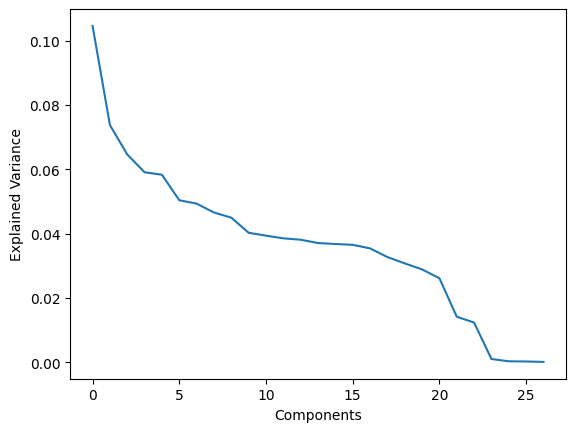

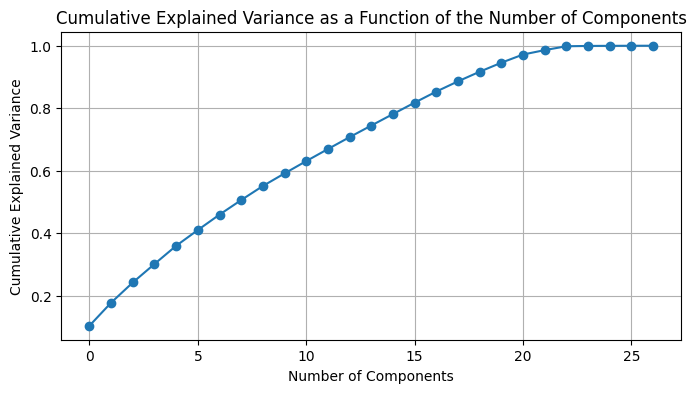

In [334]:
df_copy2 = df_copy.copy()

df_normalized=(df_copy - df_copy.mean()) / df_copy.std()
pca = PCA(n_components=df_copy.shape[1])
#pca.fit(df_normalized)
pca.fit(df_normalized)


loadings = pd.DataFrame(pca.components_.T, columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],index=df_normalized.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

# Calculate the cumulative variance explained by each component
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.grid(True)
plt.show()

   LATITUDE   LONGITUDE  Year Found Entity Type Ownership Type  \
1  1.291294  103.827476      2015.0  Subsidiary        Private   
2  1.300144  103.857517      1993.0  Subsidiary        Private   
3  1.300785  103.791263      2006.0  Subsidiary        Private   
5  1.444773  103.812740      1986.0  Subsidiary        Private   
7  1.282887  103.850849      2010.0  Subsidiary        Private   

   Employees (Single Site)  Employees (Domestic Ultimate Total)  \
1                     39.0                                100.0   
2                      4.0                                  4.0   
3                     10.0                                100.0   
5                    300.0                                  4.0   
7                     10.0                                  4.0   

   Employees (Global Ultimate Total)  Sales (Domestic Ultimate Total USD)  \
1                              100.0                         7.093536e+09   
2                                4.0          

/var/folders/18/rzq3gbk94_b3k6vkndhq8rbc0000gn/T/ipykernel_32603/1006481656.py:33: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
/var/folders/18/rzq3gbk94_b3k6vkndhq8rbc0000gn/T/ipykernel_32603/1006481656.py:38: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  score = -1*model_selection.cross_val_score(regr, X_train_pca[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
/var/folders/18/rzq3gbk94_b3k6vkndhq8rbc0000gn/T/ipykernel_32603/1006481656.py:38: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a nump

[[-3.76728549e-01 -1.64857737e-01  1.28158622e-01 ... -2.02733921e-03
  -1.85598392e-03 -5.84235814e-04]
 [-2.61514542e-01 -1.43986860e-01  7.46056102e-01 ... -1.49024382e-03
   3.10767258e-04 -4.79381423e-03]
 [-1.01969692e-01 -3.93646902e-01  1.05371931e+00 ... -2.87220060e-03
   2.04652153e-03 -3.85887676e-03]
 ...
 [-2.37508990e-03 -1.00010678e+00  5.94157520e+00 ...  2.57455090e-03
   1.23040640e-03  1.35773998e-03]
 [-3.06561583e-01  2.52611348e-01 -6.92556046e-01 ...  1.49851106e-03
  -6.47833443e-04 -3.28512251e-04]
 [-4.73155331e-01  1.21356594e-01 -7.28128381e-01 ...  2.54747405e-03
   1.24203374e-03 -4.41175979e-03]]
Mean Squared Error: 1.807897554510636e+20
R^2 Score: 0.01566188052781048


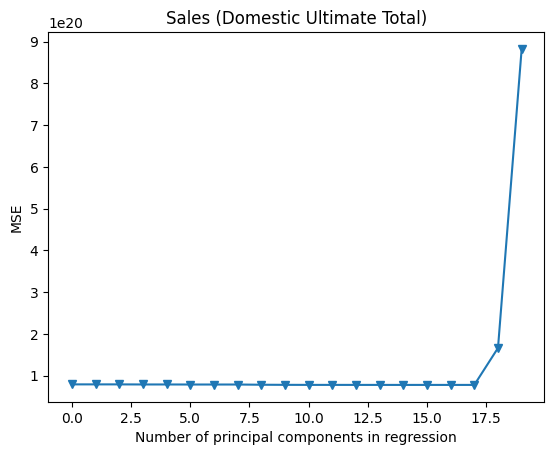

In [335]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

print(df.head())
# Assuming df_copy is your DataFrame and 'Sales (Total Domestic USD)' is your target variable
X = df_copy2
y = df.dropna()['Sales (Domestic Ultimate Total USD)']

# Standardize the data (if not already done)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Select the number of components based on cumulative variance plot + 10-Fold cross validation 

# 10-fold CV, with shuffle
n = len(X_train_pca)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_train_pca[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Sales (Domestic Ultimate Total)')
plt.xlim(xmin=-1)

# Pick 13 components 
n_components = 13
print(X_train_pca)
# Regression Model
regressor = LinearRegression()
regressor.fit(X_train_pca, y_train)

# Predictions
y_pred = regressor.predict(X_test_pca)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


## The cell below is **NOT** to be removed
##### The function is to be amended so that it accepts the given input (dataframe) and returns the required output (list). 
##### It is recommended to test the function out prior to submission
-------------------------------------------------------------------------------------------------------------------------------
##### The hidden_data parsed into the function below will have the same layout columns wise as the dataset *SENT* to you
##### Thus, ensure that steps taken to modify the initial dataset to fit into the model are also carried out in the function below

In [ ]:
def testing_hidden_data(hidden_data: pd.DataFrame) -> list:
    '''DO NOT REMOVE THIS FUNCTION.

The function accepts a dataframe as input and return an iterable (list)
of binary classes as output.

The function should be coded to test on hidden data
and should include any preprocessing functions needed for your model to perform. 
    
All relevant code MUST be included in this function.'''

    result = [] 
    return result

##### Cell to check testing_hidden_data function

In [ ]:
# This cell should output a list of predictions.
test_df = pd.read_csv(filepath)
test_df = test_df.drop(columns=['Sales (Domestic Ultimate Total USD)'])
print(testing_hidden_data(test_df))

[]


### Please have the filename renamed and ensure that it can be run with the requirements above being met. All the best!